In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/anany/Downloads/Spam-Classification/spam.csv", encoding='latin1')


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#Data cleaning
#EDA
#Text preprocessing
#Model building
#Evaluation
#Improvements depending on evaluation
#websitse


**DATA CLEANING**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
1442,ham,"Its ok., i just askd did u knw tht no?"
4199,ham,I will come tomorrow di
2893,ham,K...k...yesterday i was in cbe .
1259,ham,We have sent JD for Customer Service cum Accou...
5253,ham,Please tell me not all of my car keys are in y...


In [10]:
#rename columns because not descriptive
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [11]:
df.sample(5)

,target,text
698,ham,Mum ask Ì_ to buy food home...
4888,ham,"Japanese Proverb: If one Can do it, U too Can ..."
3208,ham,Havent mus ask if u can 1st wat. Of meet 4 lun...
1216,spam,You have 1 new voicemail. Please call 08719181...
4620,ham,"Received, understood n acted upon!"


In [12]:
#encode target variables
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

403

In [16]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

**EXPLORATORY DATA ANALYSIS**

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

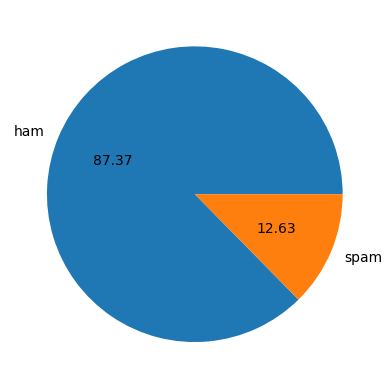

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#Data is imabalanced-lot of ham, less spam
#make 3 colums - number of alphabets,words,senetences in the sms

In [22]:
!pip install nltk

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anany\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #every sms is broken word by word into tokens

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#analyze ham and spam differently
#for ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


**For ham and spam messages, for spam messages number of characters is more**

<Axes: xlabel='num_characters', ylabel='Count'>

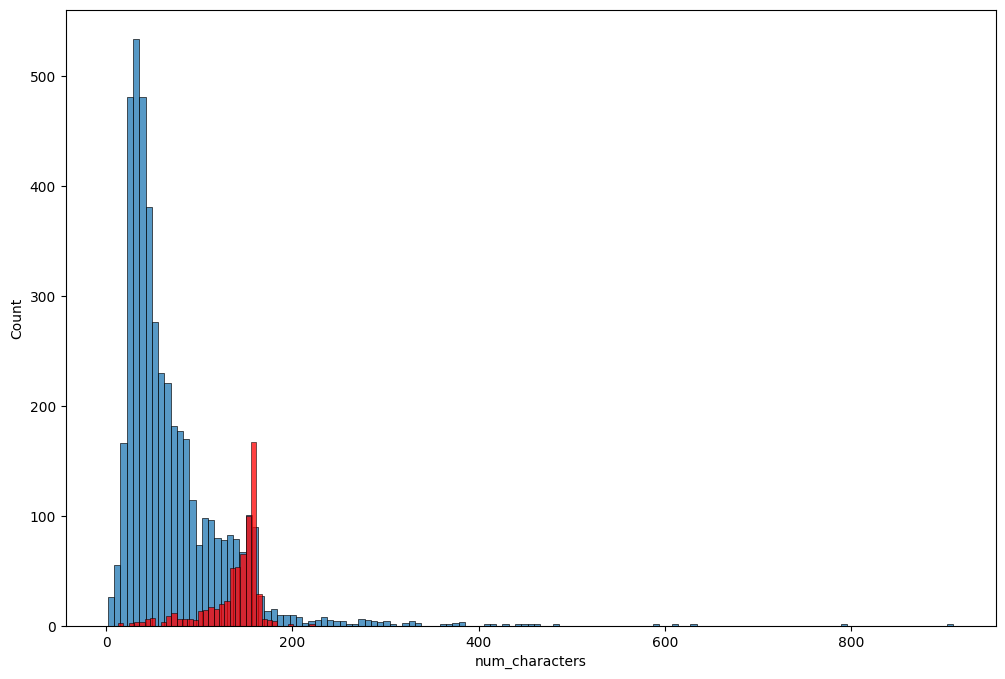

In [34]:
#plot histogram for ham and spam
plt.figure(figsize=(12,8))
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

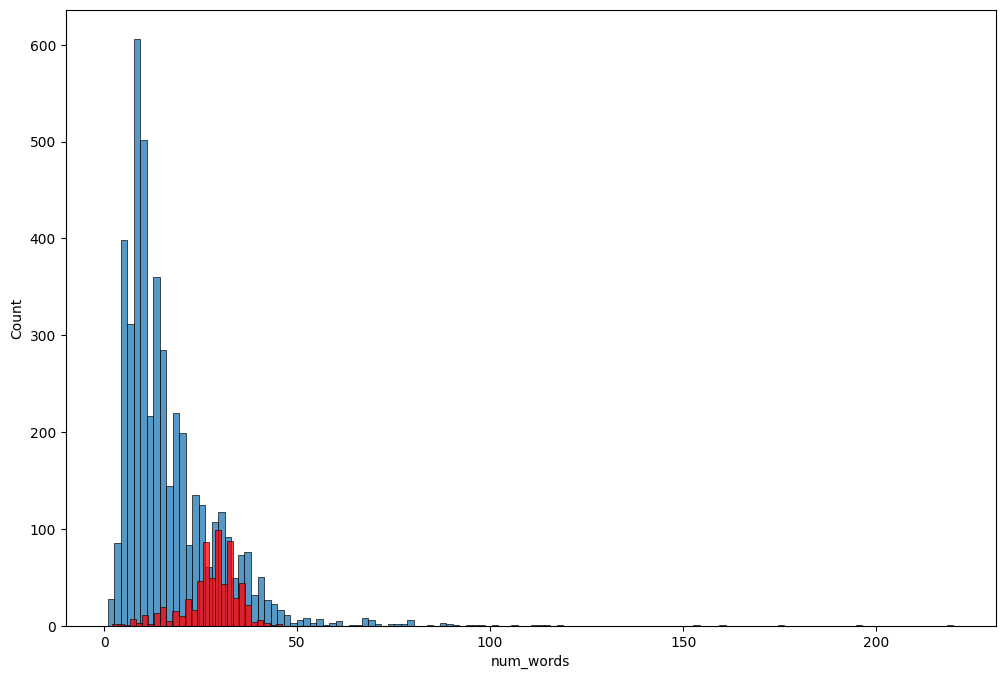

In [35]:
plt.figure(figsize=(12,8))
import seaborn as sns
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\Users\anany\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


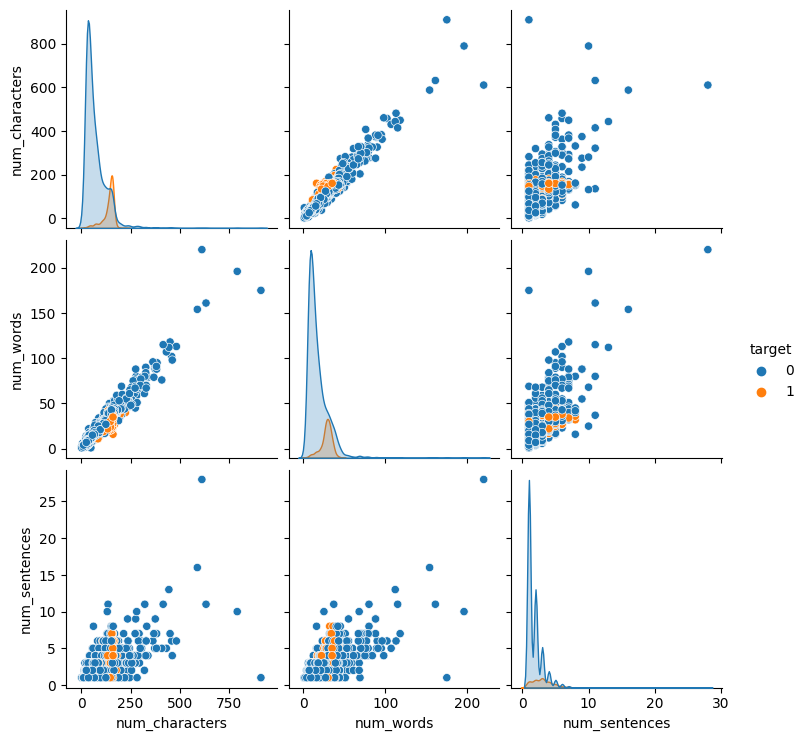

In [36]:
sns.pairplot(df,hue='target')

C:\Users\anany\AppData\Local\Temp\ipykernel_20152\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

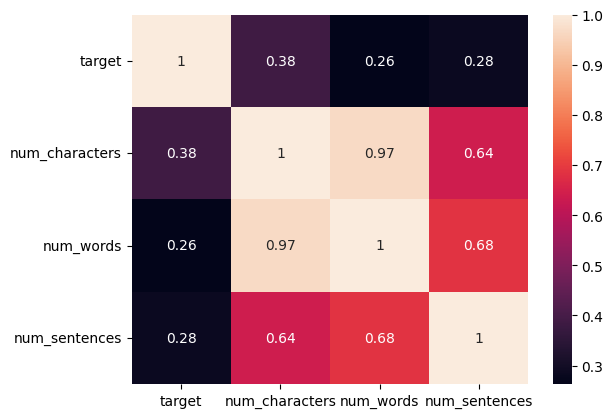

In [37]:
sns.heatmap(df.corr(),annot=True)

**We use  num_characters for model because it has high correlation with num_words and num_sentences**

**DATA PREPROCESSING**

1)Lower case conversion

2)Tokenization

3)Remove special characters

4)Remove stop words and punctuation

5)Stemming


In [38]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [42]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        #if it is alphanumeric removing special characters
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)   
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [43]:
transform_text('Hi lovely to meet you, Ananya.')

'hi love meet ananya'

In [44]:
transform_text('Did you like the lectures on Machine Learning on YT?')

'like lectur machin learn yt'

In [45]:
#for stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [46]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [47]:
df['transformed_text']=df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**Make word cloud-tells most important words in ham and spam messages**

In [49]:
!pip install wordcloud

In [50]:
from wordcloud import WordCloud

In [51]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [53]:
spam_wc

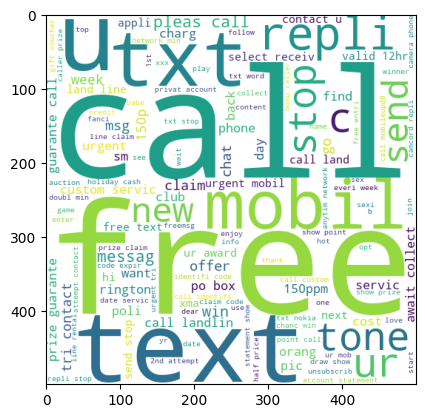

In [54]:
plt.imshow(spam_wc)

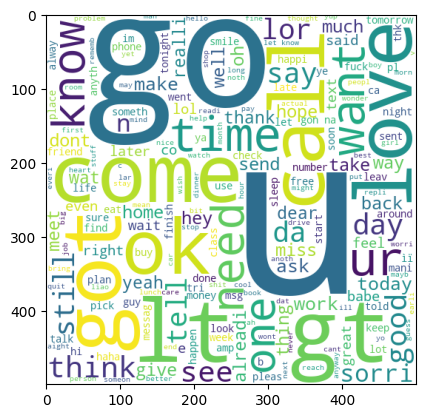

In [55]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [56]:
#Top 30 words in ham/spam messages
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [57]:
len(spam_corpus)

9939

In [58]:
from collections import Counter

In [59]:
word_counts = Counter(spam_corpus)


In [60]:
most_common_words = word_counts.most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

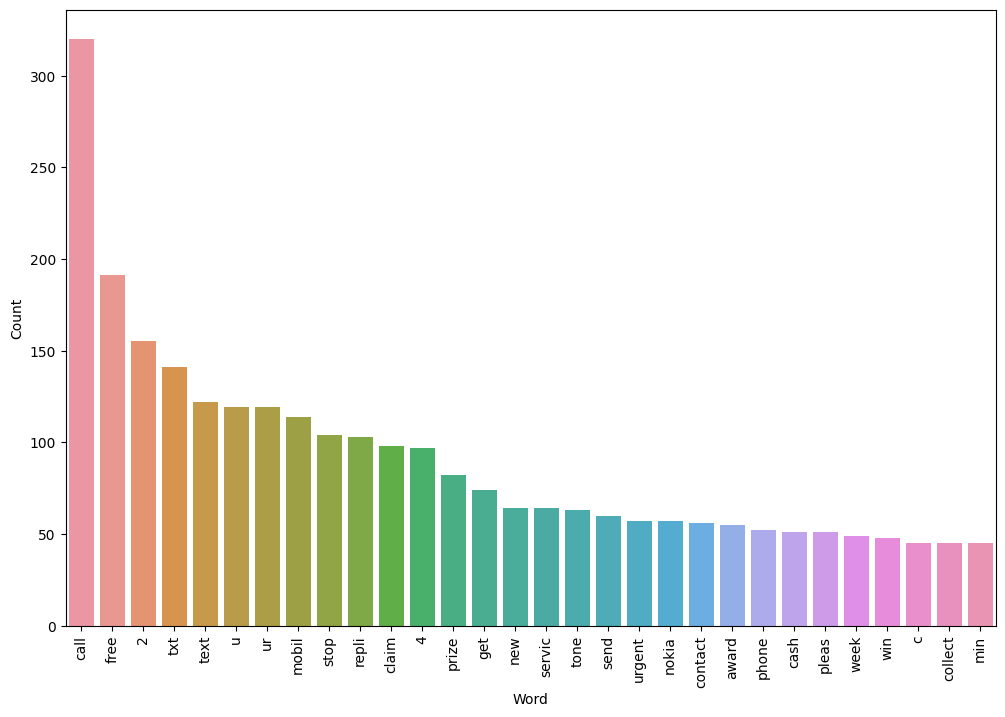

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Word', y='Count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
#for ham corpus top 30 words
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
len(ham_corpus)

35394

In [64]:
ham_counts = Counter(ham_corpus)

In [65]:
ham_common_words = ham_counts.most_common(30)
ham_common_df = pd.DataFrame(ham_common_words, columns=['Word', 'Count'])

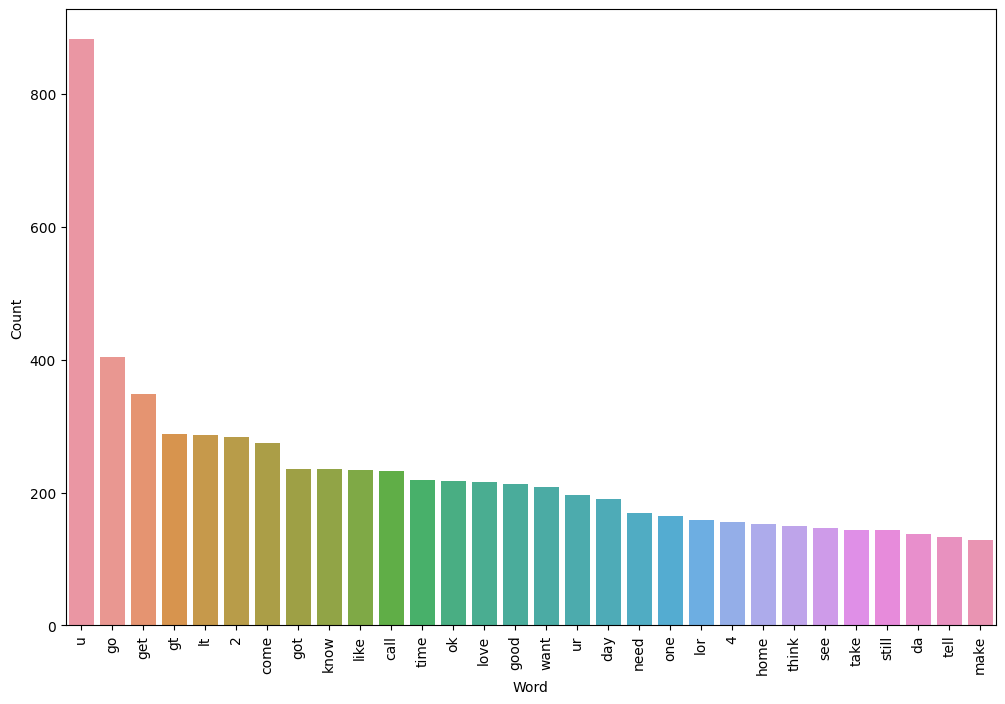

In [66]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Word', y='Count', data=ham_common_df)
plt.xticks(rotation='vertical')
plt.show()

**MODEL BUILDING**

In [67]:

!pip install scikit-learn



In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [69]:
cv=CountVectorizer()

In [70]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [71]:
X.shape

(5169, 6708)

In [72]:
y=df['target'].values

In [73]:
y.shape

(5169,)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [77]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [78]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [79]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [80]:
#tfidf---->mnb

In [81]:
!pip install xgboost


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [83]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [84]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [85]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [86]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9332688588007737, 0.7676056338028169)

In [87]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9332688588007737
Precision -  0.7676056338028169
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  0.8881578947368421
For  DT
Accuracy -  0.9235976789168279
Precision -  0.9342105263157895
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9457364341085271
For  RF
Accuracy -  0.9661508704061895
Precision -  1.0
For  AdaBoost
Accuracy -  0.9458413926499033
Precision -  0.8396946564885496
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8888888888888888
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9916666666666667
For  GBDT
Accuracy -  0.9342359767891683
Precision -  0.8811881188118812
For  xgb
Accuracy -  0.9632495164410058
Precision -  0.9022556390977443


In [88]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [89]:
performance_df #K-Nearest neighbours highest precision

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
5,RF,0.966151,1.000000
8,ETC,0.973888,0.991667
4,LR,0.970986,0.945736
3,DT,0.923598,0.934211
10,xgb,0.963250,0.902256
7,BgC,0.954545,0.888889
2,NB,0.973888,0.888158
9,GBDT,0.934236,0.881188
6,AdaBoost,0.945841,0.839695


In [90]:
performance_df_2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [91]:
performance_df_2 #Naive Bayes highest accuracy

,Algorithm,Accuracy,Precision
2,NB,0.973888,0.888158
8,ETC,0.973888,0.991667
4,LR,0.970986,0.945736
5,RF,0.966151,1.000000
10,xgb,0.963250,0.902256
7,BgC,0.954545,0.888889
6,AdaBoost,0.945841,0.839695
9,GBDT,0.934236,0.881188
0,SVC,0.933269,0.767606
3,DT,0.923598,0.934211


In [92]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")  #Makes Algorithm the identifier

In [93]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,RF,Accuracy,0.966151
2,ETC,Accuracy,0.973888
3,LR,Accuracy,0.970986
4,DT,Accuracy,0.923598
5,xgb,Accuracy,0.963250
6,BgC,Accuracy,0.954545
7,NB,Accuracy,0.973888
8,GBDT,Accuracy,0.934236
9,AdaBoost,Accuracy,0.945841


C:\Users\anany\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


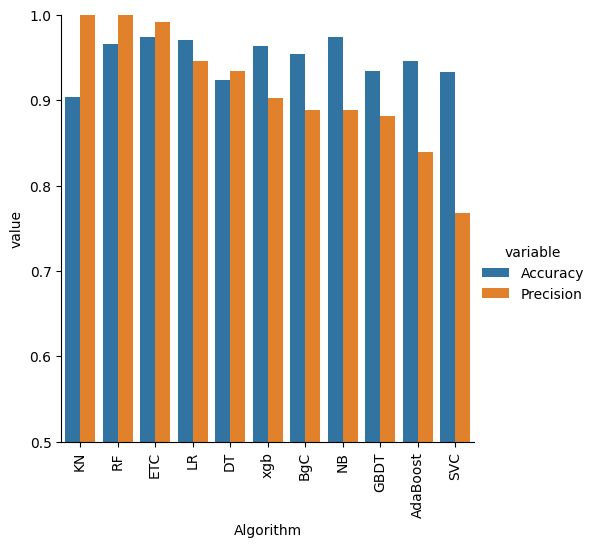

In [94]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
!pip install scikit-learn


**IMPROVE THE MODEL USING TFIDF**

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [97]:
tfidf= TfidfVectorizer(max_features=3000)

In [98]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [99]:
X.shape

(5169, 3000)

In [100]:
y=df['target'].values

In [101]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [103]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [104]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [105]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
For  KN
Accuracy -  0.9090909090909091
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8688524590163934
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9836065573770492
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8832116788321168
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9841269841269841
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.95
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9242424242424242


In [106]:
performance_df3 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df3

,Algorithm,Accuracy,Precision
1,KN,0.909091,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.973888,0.983607
0,SVC,0.976789,0.954887
9,GBDT,0.946809,0.950000
10,xgb,0.968085,0.924242
7,BgC,0.961315,0.883212
4,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


In [107]:
performance_df4 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df4

,Algorithm,Accuracy,Precision
8,ETC,0.977756,0.984127
0,SVC,0.976789,0.954887
5,RF,0.973888,0.983607
2,NB,0.972921,0.991597
10,xgb,0.968085,0.924242
7,BgC,0.961315,0.883212
6,AdaBoost,0.950677,0.867188
4,LR,0.946809,0.868852
9,GBDT,0.946809,0.950000
3,DT,0.933269,0.833333


In [108]:
performance_df_new = pd.melt(performance_df3, id_vars = "Algorithm")

C:\Users\anany\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


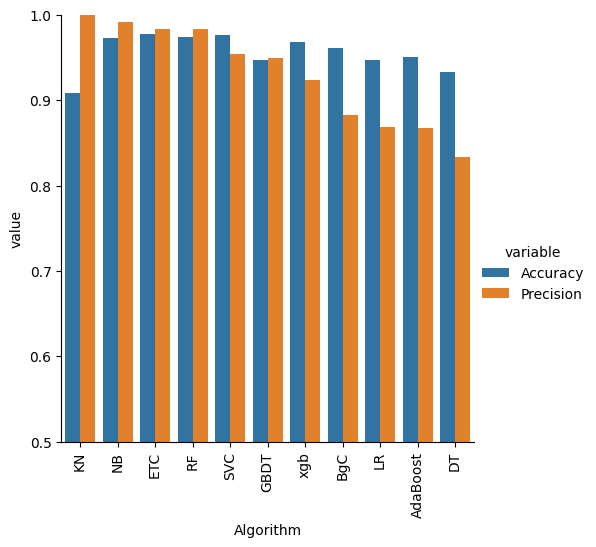

In [109]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df_new, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

**AFTER APPLYING TF-IDF, THE HIGHEST ACCURACY IS BY RANDOM FOREST CLASSIFIER AND THE HIGHEST PRECISION IS KNN**

In [110]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [111]:
scaler = MinMaxScaler()
scaled_accuracy_scores = scaler.fit_transform(np.array(accuracy_scores).reshape(-1, 1))
scaled_precision_scores = scaler.fit_transform(np.array(precision_scores).reshape(-1, 1))

In [112]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores})


In [113]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.976789,0.954887
1,KN,0.909091,1.000000
2,NB,0.972921,0.991597
3,DT,0.933269,0.833333
4,LR,0.946809,0.868852
5,RF,0.973888,0.983607
6,AdaBoost,0.950677,0.867188
7,BgC,0.961315,0.883212
8,ETC,0.977756,0.984127
9,GBDT,0.946809,0.950000


In [114]:
temp_df['Scaled_Accuracy_max_ft_3000'] = scaled_accuracy_scores
temp_df['Scaled_Precision_max_ft_3000'] = scaled_precision_scores

In [115]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,Scaled_Accuracy_max_ft_3000,Scaled_Precision_max_ft_3000
0,SVC,0.976789,0.954887,0.985915,0.729323
1,KN,0.909091,1.000000,0.000000,1.000000
2,NB,0.972921,0.991597,0.929577,0.949580
3,DT,0.933269,0.833333,0.352113,0.000000
4,LR,0.946809,0.868852,0.549296,0.213115
5,RF,0.973888,0.983607,0.943662,0.901639
6,AdaBoost,0.950677,0.867188,0.605634,0.203125
7,BgC,0.961315,0.883212,0.760563,0.299270
8,ETC,0.977756,0.984127,1.000000,0.904762
9,GBDT,0.946809,0.950000,0.549296,0.700000


In [116]:
#merging performance df and temp df
new_df = performance_df.merge(temp_df, on='Algorithm')


In [117]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Scaled_Accuracy_max_ft_3000,Scaled_Precision_max_ft_3000
0,KN,0.904255,1.000000,0.909091,1.000000,0.000000,1.000000
1,RF,0.966151,1.000000,0.973888,0.983607,0.943662,0.901639
2,ETC,0.973888,0.991667,0.977756,0.984127,1.000000,0.904762
3,LR,0.970986,0.945736,0.946809,0.868852,0.549296,0.213115
4,DT,0.923598,0.934211,0.933269,0.833333,0.352113,0.000000
5,xgb,0.963250,0.902256,0.968085,0.924242,0.859155,0.545455
6,BgC,0.954545,0.888889,0.961315,0.883212,0.760563,0.299270
7,NB,0.973888,0.888158,0.972921,0.991597,0.929577,0.949580
8,GBDT,0.934236,0.881188,0.946809,0.950000,0.549296,0.700000
9,AdaBoost,0.945841,0.839695,0.950677,0.867188,0.605634,0.203125


**A Voting Classifier aggregates the predictions of different base models and selects the class label that receives the most "votes" from the individual models.**

**Here, we use soft voting- In soft voting, the individual models predict the class probabilities, and the final prediction is the class label with the highest average probability across all models.**

In [118]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [119]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [120]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [121]:
y_pred = voting.predict(x_test)

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [123]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9816247582205029
Precision: 0.9921875
Recall: 0.8758620689655172
F1 Score: 0.9304029304029304
Confusion Matrix:
 [[888   1]
 [ 18 127]]


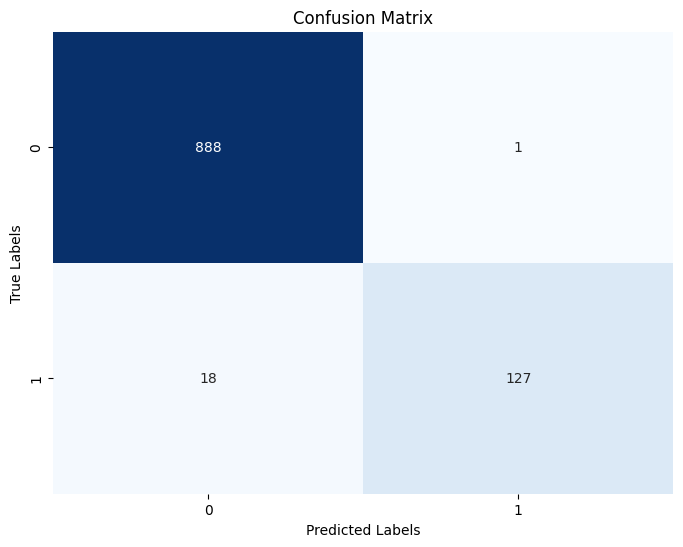

In [124]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [125]:
import pickle


In [126]:
from sklearn.ensemble import StackingClassifier

In [127]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [128]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [131]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.9779411764705882


In [134]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))